# Predict Bike-Sharing need in Metropolitan Area

Programming Language: R 3.6.1 in Jupyter Notebook

R Libraries used:
- library(psych)
- library(lattice)
- library(GGally)
- library(ggplot2)
- library(car)
- library(caret)

## Table of Contents

1. [Introduction](#sec_1)
2. [Data Exploration](#sec_2)
* [Exploratory Data Analysis](#sec_3)
* [Methodology](#sec_4)
* [Model Development](#sec_5)
* [Model Comparison](#sec_6)
* [Inference](#sec_7)
* [Conclusion](#sec_8)
* [References](#sec_9)

In [1]:
library(psych)
library(lattice)
library(GGally)
library(ggplot2)
library(car)
library(caret)

## 1. Introduction <a class="anchor" id="sec_1"></a>

In recent years, bike sharing has been well received all around the world, and leads to significant impacts on establishing a larger cycling community, increasing the use of transportation, minimizing greenhouse gas emissions, enhancing public health and also traffic troubles. It is important to make sure that the right amount of rental bikes are available and accessible at the right place and at the right time, providing a city with a stable and sustainable supply of rental bikes. In order to do so, one important task is to predict the hourly rental bike demand as accurately as possible.

In this task, we are interested in exploring machine learning approaches to predict the demands for bike sharing based on relevant data such as weather, season, holiday, etc, which are known to influence the demands for bike renting. The aim is to build statistical learning models that can predict how many bikes are required in a particular area at a particular time, and identify the major factors that affect the bike demand.

## 2. Data Exploration<a class="anchor" id="sec_2"></a>

In [2]:
# reading the training data provided
train.data <- read.csv('train.csv',T)

In [3]:
# view some initial and final data records
head(train.data)
tail(train.data)

Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
13/3/18,705,14,18.3,43,2.2,1509,5.4,2.43,0,0,Spring,No Holiday,Yes
15/3/18,289,14,12.1,97,2.0,177,11.6,0.20,0,0,Spring,No Holiday,Yes
29/11/18,126,5,1.8,34,0.9,1990,-12.4,0.00,0,0,Autumn,No Holiday,Yes
4/4/18,378,9,10.4,81,1.4,2000,7.2,0.36,0,0,Spring,No Holiday,Yes
15/2/18,236,17,2.4,17,3.1,1990,-20.2,0.78,0,0,Winter,Holiday,Yes
20/4/18,708,10,18.2,36,1.0,620,2.8,1.99,0,0,Spring,No Holiday,Yes


,Date,Rented.Bike.Count,Hour,Temperature,Humidity,Wind.speed,Visibility,Dew.point.temperature,Solar.Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning.Day
7003,27/1/18,189,13,-6.6,27,2.1,1889,-22.5,1.24,0,0.3,Winter,No Holiday,Yes
7004,21/9/18,127,8,17.8,97,2.0,1284,17.3,0.09,4,0.0,Autumn,No Holiday,Yes
7005,11/2/18,58,3,-7.2,43,2.0,2000,-17.6,0.00,0,0.0,Winter,No Holiday,Yes
7006,30/3/18,115,4,9.9,67,1.1,820,4.0,0.00,0,0.0,Spring,No Holiday,Yes
7007,29/11/18,800,7,0.8,41,0.6,1298,-10.9,0.00,0,0.0,Autumn,No Holiday,Yes
7008,14/2/18,349,13,7.2,65,3.8,773,1.0,0.61,0,0.0,Winter,No Holiday,Yes


In [4]:
cat("Our data has", dim(train.data)[1], "records for" , dim(train.data)[2], "variables.")

Our data has 7008 records for 14 variables.

#### Attribute Information:

- **Date** : year-month-day
- **Rented Bike count**: Count of bikes rented at each hour, the response variable 
- **Hour**: Hour of the day
- **Temperature**: Temperature in Celsius
- **Humidity**: in %
- **Windspeed**: m/s
- **Visibility**: 10m
- **Dew point temperature**: Celsius
- **Solar radiation**: MJ/m2
- **Rainfall**: mm
- **Snowfall**: cm
- **Seasons**: Winter, Spring, Summer, Autumn
- **Holiday**: Holiday/No holiday, indicating if the corresponding date is a public holiday or not
- **Functional Day**: NoFunc(Non Functional Hours), Fun(Functional hours), the variable indicates the days when the rental bike                      system does not operate.


## 3. Exploratory Data Analysis<a class="anchor" id="sec_3"></a>

In [5]:
# check the structure of each column of dataframe
str(train.data)

'data.frame':	7008 obs. of  14 variables:
 $ Date                 : Factor w/ 365 levels "1/1/18","1/10/18",..: 54 78 255 300 77 151 105 353 210 10 ...
 $ Rented.Bike.Count    : int  705 289 126 378 236 708 715 1001 502 17 ...
 $ Hour                 : int  14 14 5 9 17 10 8 1 20 18 ...
 $ Temperature          : num  18.3 12.1 1.8 10.4 2.4 18.2 21.1 18.9 10.7 22.2 ...
 $ Humidity             : int  43 97 34 81 17 36 70 55 70 96 ...
 $ Wind.speed           : num  2.2 2 0.9 1.4 3.1 1 0.3 2.3 2.8 1.2 ...
 $ Visibility           : int  1509 177 1990 2000 1990 620 766 2000 236 673 ...
 $ Dew.point.temperature: num  5.4 11.6 -12.4 7.2 -20.2 2.8 15.4 9.6 5.4 21.5 ...
 $ Solar.Radiation      : num  2.43 0.2 0 0.36 0.78 1.99 0.9 0 0 0.09 ...
 $ Rainfall             : num  0 0 0 0 0 0 0 0 0 3.5 ...
 $ Snowfall             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Seasons              : Factor w/ 4 levels "Autumn","Spring",..: 2 2 1 2 4 2 3 1 2 3 ...
 $ Holiday              : Factor w/ 2 levels "Holiday"

In [6]:
# to check the distribution of each variable
summary(train.data)

       Date      Rented.Bike.Count      Hour        Temperature    
 30/7/18 :  24   Min.   :   0.0    Min.   : 0.00   Min.   :-17.50  
 10/11/18:  23   1st Qu.: 188.0    1st Qu.: 5.75   1st Qu.:  3.40  
 18/11/18:  23   Median : 503.0    Median :11.00   Median : 13.60  
 19/8/18 :  23   Mean   : 703.2    Mean   :11.46   Mean   : 12.83  
 20/1/18 :  23   3rd Qu.:1063.0    3rd Qu.:17.00   3rd Qu.: 22.50  
 21/4/18 :  23   Max.   :3556.0    Max.   :23.00   Max.   : 39.40  
 (Other) :6869                                                     
    Humidity       Wind.speed     Visibility     Dew.point.temperature
 Min.   : 0.00   Min.   :0.00   Min.   :  27.0   Min.   :-30.600      
 1st Qu.:42.00   1st Qu.:0.90   1st Qu.: 944.8   1st Qu.: -4.700      
 Median :57.00   Median :1.50   Median :1693.0   Median :  5.000      
 Mean   :58.25   Mean   :1.72   Mean   :1436.0   Mean   :  4.029      
 3rd Qu.:74.00   3rd Qu.:2.30   3rd Qu.:2000.0   3rd Qu.: 14.800      
 Max.   :98.00   Max.   :7.40 

In [7]:
round(describe(train.data), 3)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
Date*,1,7008,183.455,105.343,183.00,183.401,134.917,1.0,365.00,364.00,0.005,-1.200,1.258
Rented.Bike.Count,2,7008,703.151,645.874,503.00,610.770,557.458,0.0,3556.00,3556.00,1.138,0.753,7.715
Hour,3,7008,11.457,6.907,11.00,11.445,8.896,0.0,23.00,23.00,0.014,-1.195,0.083
Temperature,4,7008,12.833,11.940,13.60,13.135,13.936,-17.5,39.40,56.90,-0.192,-0.854,0.143
Humidity,5,7008,58.248,20.358,57.00,58.059,23.722,0.0,98.00,98.00,0.052,-0.807,0.243
Wind.speed,6,7008,1.720,1.033,1.50,1.623,1.038,0.0,7.40,7.40,0.893,0.723,0.012
Visibility,7,7008,1435.980,608.623,1693.00,1508.575,455.158,27.0,2000.00,1973.00,-0.704,-0.956,7.270
Dew.point.temperature,8,7008,4.029,13.047,5.00,4.707,14.529,-30.6,26.80,57.40,-0.363,-0.762,0.156
Solar.Radiation,9,7008,0.571,0.872,0.01,0.386,0.015,0.0,3.52,3.52,1.499,1.100,0.010
Rainfall,10,7008,0.152,1.166,0.00,0.000,0.000,0.0,35.00,35.00,14.792,291.748,0.014


Some observations from the Summary: 

* Date column has 354 unique values and the Seasons column also covers all the 4 seasons, therefore, the data provided is for the whole year.


* Rented bike count has the highest range accross the data, with 3556 bikes being highest number of bikes rented on a single day.

* Visisbility column has the second highest range and standard deviation. With the median value larger than the mean and closer in magnitude to the maximum value. The visibility column is left skewed.


* Solar radiation has the least range for a numerical column with 3.52 MJ/sq.m. being the maximum value. The region included in the data receives very less solar radiation as the highest solar radiation value is 35 MJ/sq.m.


* The mean rainfall received by the region is also quite less for the whole year at 0.152 mm.




We can compare the standard deviation for variables 

In [8]:
sort(apply(train.data[,c(-1,-12,-13,-14)], 2, sd))

Snowfall       Solar.Radiation            Wind.speed 
            0.4428022             0.8718680             1.0333628 
             Rainfall                  Hour           Temperature 
            1.1664914             6.9070482            11.9399081 
Dew.point.temperature              Humidity            Visibility 
           13.0471466            20.3581093           608.6228340 
    Rented.Bike.Count 
          645.8735688

The lowest standard deviation is for "Snowfall" variable, and "Rented Bike Count" has the highest standard deviation. Having a high standard deviation means that the variable is evenly spread across the whole dataset.

We plot multiple boxplots for all the continuous variables as their value scales are different. Therefore, plotting them in a single plot would not give a proper overview of the variable's values.

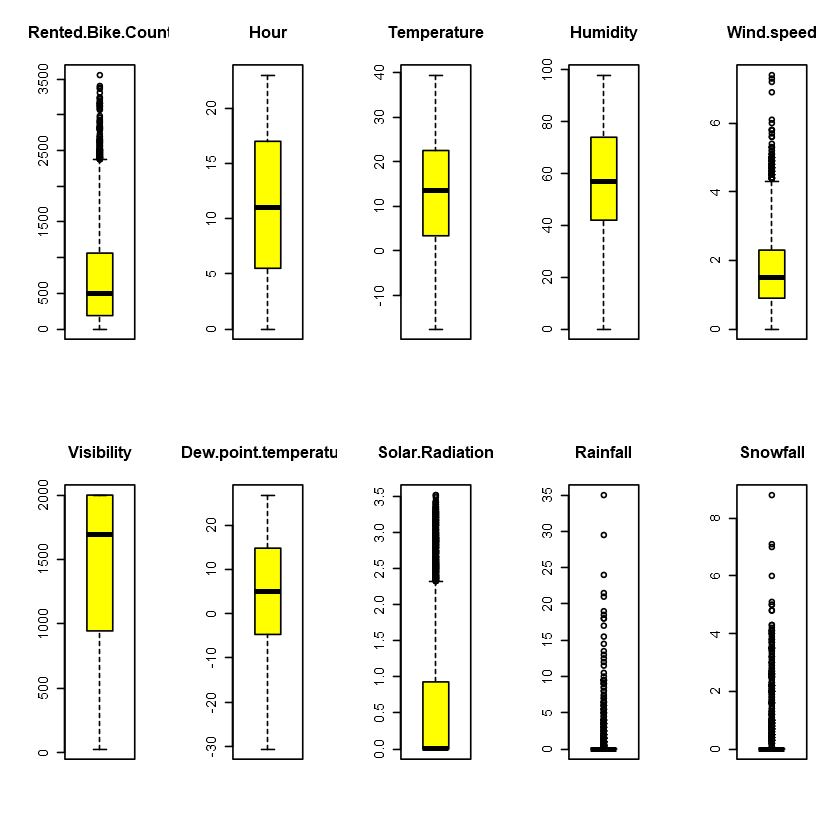

In [9]:
# make boxplot for only the continuous variables
par(mfrow = c(2,5)) 
for (i in 2:11) {
        boxplot(train.data[,i], main = names(train.data[i]), type="l", col='yellow')
}

We can infer from the above boxplots that - 

* The majority of values for Rainfall and Snowfall variable are 0 and hence most of the other values lie outside the box, that can be potential outliers.

* The values for Temperature, Hour and Humidity have almost symmetric distributions. Whereas Rented.Bike.count, Wind.speed, Visibility, Dew.point.temperature and Solar.radiation have skewed distribution.

Now, we plot a correlation matrix to understand the correlation between the continuous variables.

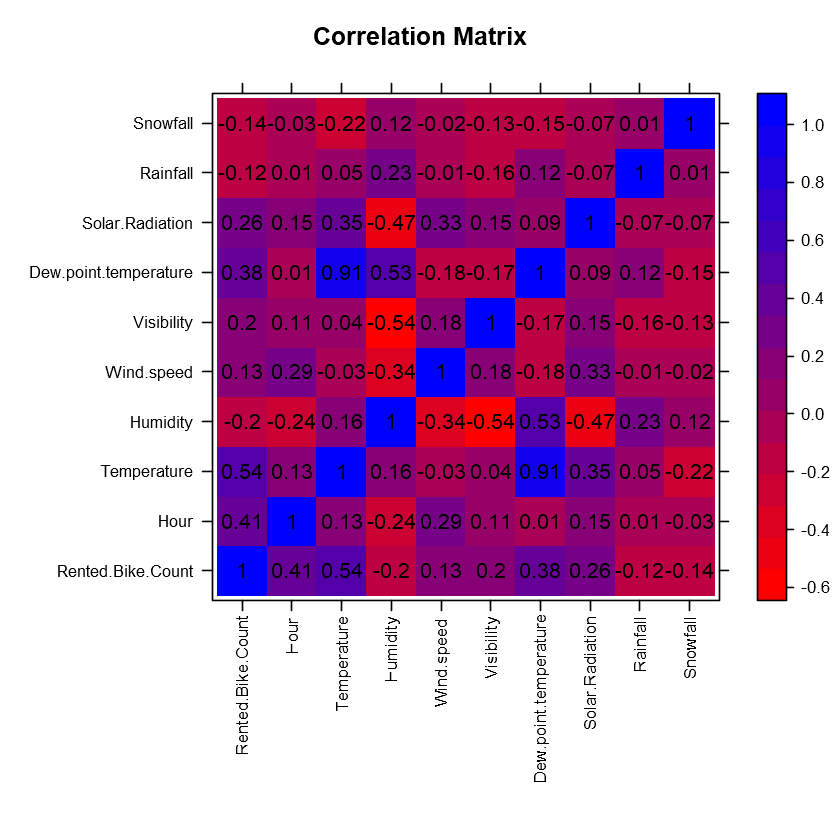

In [10]:
# Define you own panel
myPanel <- function(x, y, z, ...) {
    panel.levelplot(x,y,z,...)
    panel.text(x, y, round(z, 2))
}

#Define the color scheme
cols = colorRampPalette(c("red","blue"))

#Plot the correlation matrix.
levelplot(cor(train.data[2:11]), col.regions = cols(100), main = "Correlation Matrix", xlab = NULL, ylab = NULL, 
          scales = list(x = list(rot = 90)), panel = myPanel)

From the correlation matrix we can observe that -


* Rented.Bike.Count variable has a high positive correlation with Temperature and high negative correlation with Humidity. This shows that as the temperature increases the bike count increases and as the humidity increases the bike count decreases.

* Temperature and Dew.point.temperature variables have the highest correlation as both are just measures of temperature taken to a different reference. Therefore, any one measure of temperature can be ignored.

* Visibility has negative correlation with both Rainfall and Snowfall which is true according to the real scenario. Visibility decreases if there is a Rainfall or Snowfall.

The following plot provides a better picture of the correlation plots between the variables with distribution curves of each variable respectively.

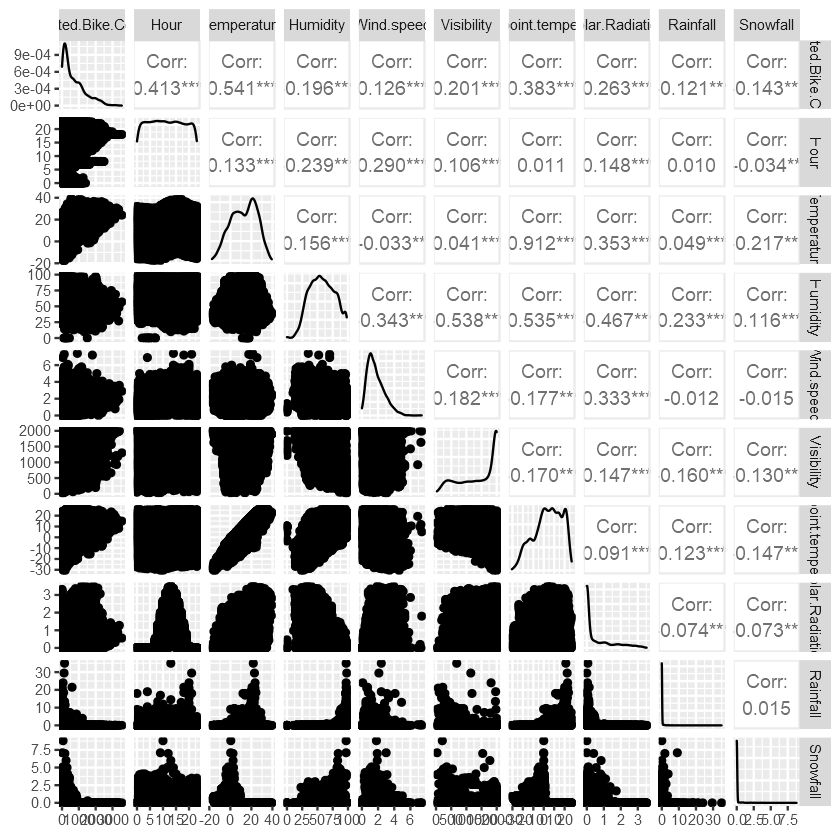

In [11]:
# use the ggpairs function from GGally library to get correlation plot
ggpairs(train.data[2:11])

From the above plot, we can see that - 
* Temperature has a bimodal normal distribution, with a very smooth correlation scatter plot with Dew.Pont.Temperature.

* Rented.Bike.Count has an approximately normal distribution which is skewed to the right.

* Rainfall and Snowfall have majority of their values as Zero. Therefore, there is no significant distribution observed.

Now we visualize **Discrete Variables Vs Target Variable** plots to understand how the Rented.Bike.Count is affected by the values of the Discrete Variables in the dataset.

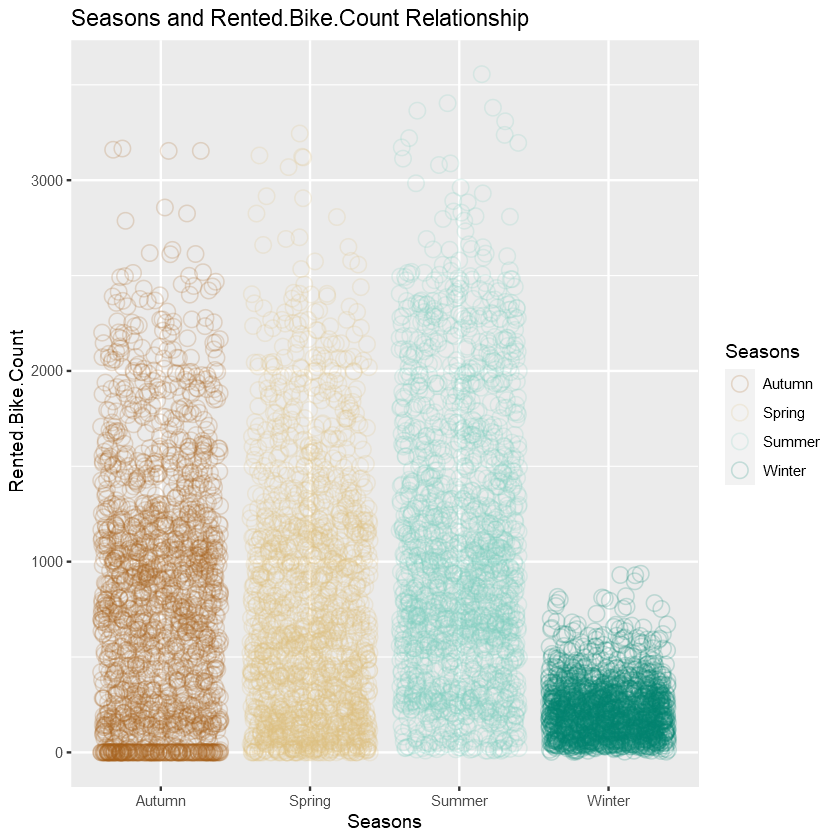

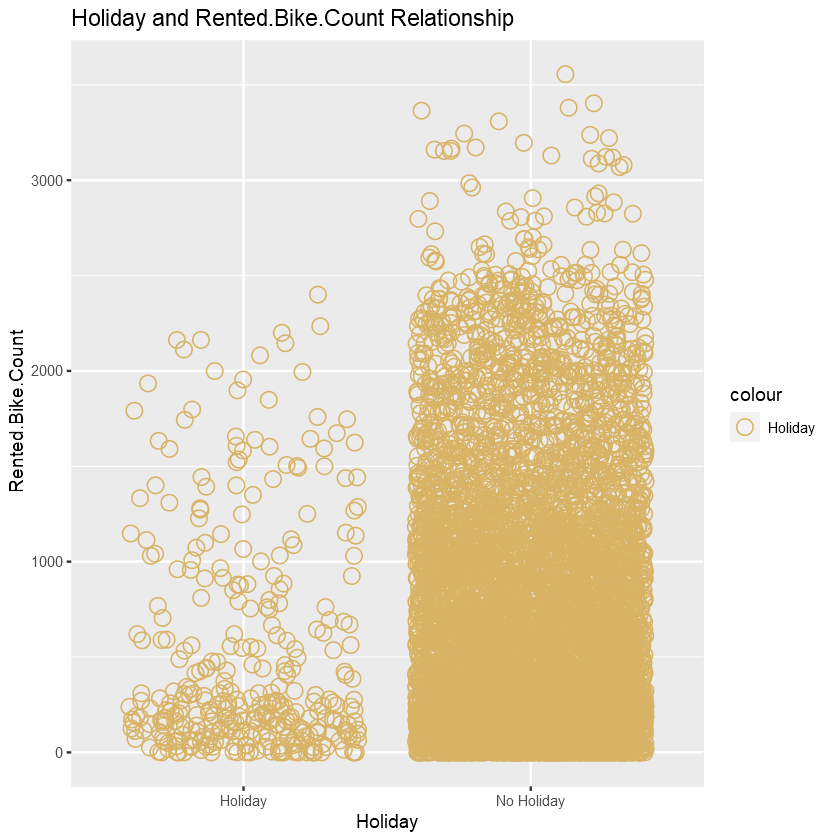

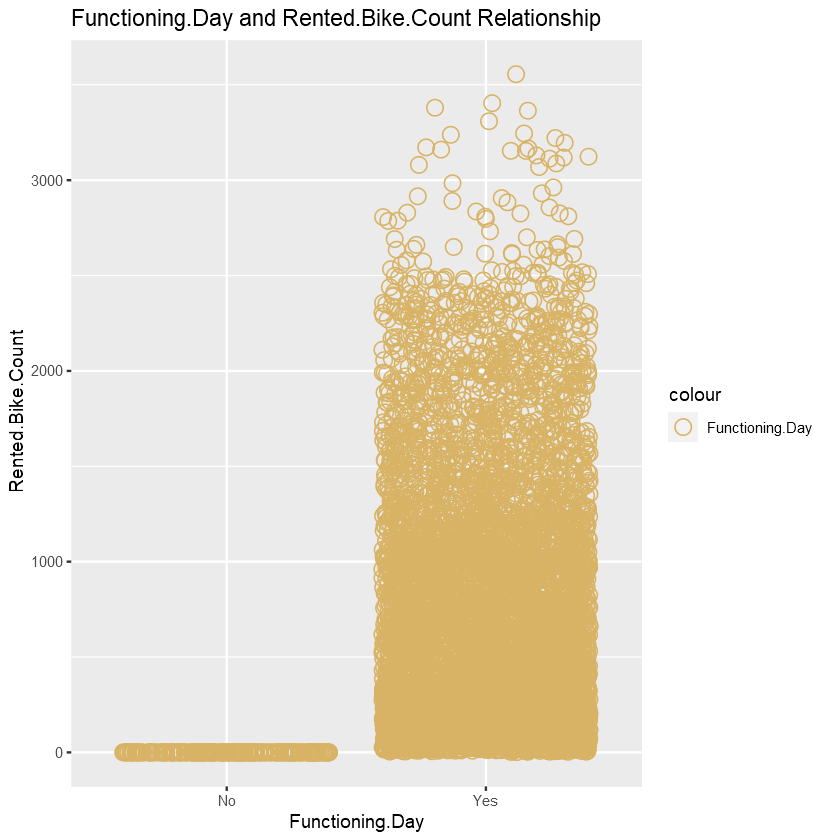

In [12]:
# using ggplot() function to plot the jitter plots
par(mfrow=c(1,3))
ggplot(aes(x= Seasons,y=Rented.Bike.Count),data = train.data) + geom_jitter(aes(color = Seasons),alpha=1/5,,pch=21, cex=4) +
scale_color_brewer(type = 'div') + ggtitle('Seasons and Rented.Bike.Count Relationship')
ggplot(aes(x= Holiday,y=Rented.Bike.Count),data = train.data) + geom_jitter(aes(color = 'Holiday'),alpha=1,,pch=21, cex=4) +
scale_color_brewer(type = 'div') + ggtitle('Holiday and Rented.Bike.Count Relationship') 
ggplot(aes(x= Functioning.Day,y=Rented.Bike.Count),data = train.data) +  geom_jitter(aes(color = 'Functioning.Day'),alpha=1,,pch=21, cex=4) +
scale_color_brewer(type = 'div') + ggtitle('Functioning.Day and Rented.Bike.Count Relationship') 

From the above jitter plots, we observe that - 
* **Seasons and Rented.Bike.Count Relationship** - shows that lowest bikes were rented in the winter season and the highest in the summer season.
* **Holiday and Rented.Bike.Count Relationship** - shows that the highest number of bikes were rented when there was no holiday with some exceptionally high values on holidays. 
* **Functioning.Day and Rented.Bike.Count Relationship** - Obvious observation that the bikes were rented when the Rentals were functioning and not rented on the non-functioning days.

In the next sections, we discuss the methodolgy for the development of the model to predict 'Rented.Bike.Count' variable in the test data set.

## 4. Methodology<a class="anchor" id="sec_4"></a>

We develop **Multiple Linear Regression** models in order to estimate the 'Rented.Bike.Count' variable given any test data. Regression model is specifically used as the predicted variable is a continuous variable and not discrete class variable.

We will follow the following procedure - 
* We first develop a full model, having all the variables in it. Then, will perform stepwise regression to remove the non-significant variables.
* Perform Residual plots analysis on the obtained model. If there is no heteroskedacity then it will become our first model,otherwise we will further make the corrections to obtain a final first model.
* Next, we will add variable interactions to the first model and obtain our second model. 
* Finally we will perform analysis to select the best of the two obtained models.

## 5. Model Development <a class="anchor" id="sec_5"></a>

Throughout the model development process we will use step() to remove unimportant variable.

In [13]:
# fitting all the variables to the model
# using lm() function to perform multiple linear regression
fit <- lm(Rented.Bike.Count ~ ., data = train.data)

In [14]:
# show the model parameters
summary(fit)


Call:
lm(formula = Rented.Bike.Count ~ ., data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1182.18  -242.40   -39.18   195.10  1716.64 

Coefficients: (4 not defined because of singularities)
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -4.969e+02  2.338e+02  -2.125 0.033616 *  
Date1/10/18            1.514e+02  1.508e+02   1.004 0.315195    
Date1/11/18            3.084e+02  1.412e+02   2.185 0.028931 *  
Date1/12/17            2.504e+02  1.301e+02   1.925 0.054260 .  
Date1/2/18             8.516e+01  1.373e+02   0.620 0.535097    
Date1/3/18             1.297e+02  1.396e+02   0.929 0.352749    
Date1/4/18            -1.398e+02  1.423e+02  -0.982 0.326117    
Date1/5/18             4.697e+01  1.468e+02   0.320 0.748939    
Date1/6/18            -6.793e+01  1.497e+02  -0.454 0.650049    
Date1/7/18            -9.099e+02  1.542e+02  -5.900 3.81e-09 ***
Date1/8/18            -1.128e+03  1.653e+02  -6.828 9.36e-12 **

**NA** in the Seasons and Holiday variable show that there is collinearity between those variables. Having those variables in the model will decrease the accuracy of the model and should be removed.

Use the step() function to choose more significant variables.

In [15]:
# perform stepwise variable selection
step_fit <- step(fit)

Start:  AIC=83505.75
Rented.Bike.Count ~ Date + Hour + Temperature + Humidity + Wind.speed + 
    Visibility + Dew.point.temperature + Solar.Radiation + Rainfall + 
    Snowfall + Seasons + Holiday + Functioning.Day


Step:  AIC=83505.75
Rented.Bike.Count ~ Date + Hour + Temperature + Humidity + Wind.speed + 
    Visibility + Dew.point.temperature + Solar.Radiation + Rainfall + 
    Snowfall + Seasons + Functioning.Day


Step:  AIC=83505.75
Rented.Bike.Count ~ Date + Hour + Temperature + Humidity + Wind.speed + 
    Visibility + Dew.point.temperature + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day

                         Df Sum of Sq        RSS   AIC
- Dew.point.temperature   1     45975  942089752 83504
<none>                                 942043777 83506
- Functioning.Day         1   1296865  943340642 83513
- Wind.speed              1   1742824  943786601 83517
- Humidity                1   3403510  945447287 83529
- Snowfall                1   3501874  945545651 

In [16]:
# summarise the model parameters
summary(step_fit)


Call:
lm(formula = Rented.Bike.Count ~ Date + Hour + Temperature + 
    Humidity + Wind.speed + Visibility + Solar.Radiation + Rainfall + 
    Snowfall + Functioning.Day, data = train.data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1180.94  -242.38   -39.17   195.71  1717.54 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -5.521e+02  2.128e+02  -2.595 0.009487 ** 
Date1/10/18         1.605e+02  1.499e+02   1.070 0.284488    
Date1/11/18         3.133e+02  1.409e+02   2.224 0.026190 *  
Date1/12/17         2.493e+02  1.301e+02   1.917 0.055342 .  
Date1/2/18          8.410e+01  1.373e+02   0.613 0.540135    
Date1/3/18          1.309e+02  1.395e+02   0.938 0.348277    
Date1/4/18         -1.312e+02  1.415e+02  -0.927 0.354018    
Date1/5/18          5.778e+01  1.455e+02   0.397 0.691329    
Date1/6/18         -5.768e+01  1.486e+02  -0.388 0.697992    
Date1/7/18         -8.989e+02  1.530e+02  -5.876 4.42e-09 ***
Date1/8/

Step function removed **Seasons**, **Dew.point.temperature** and **Holiday** variables from our model. From the summary of our new model we get the new $R^2$=0.6596 which is only slightly higher than previous model.

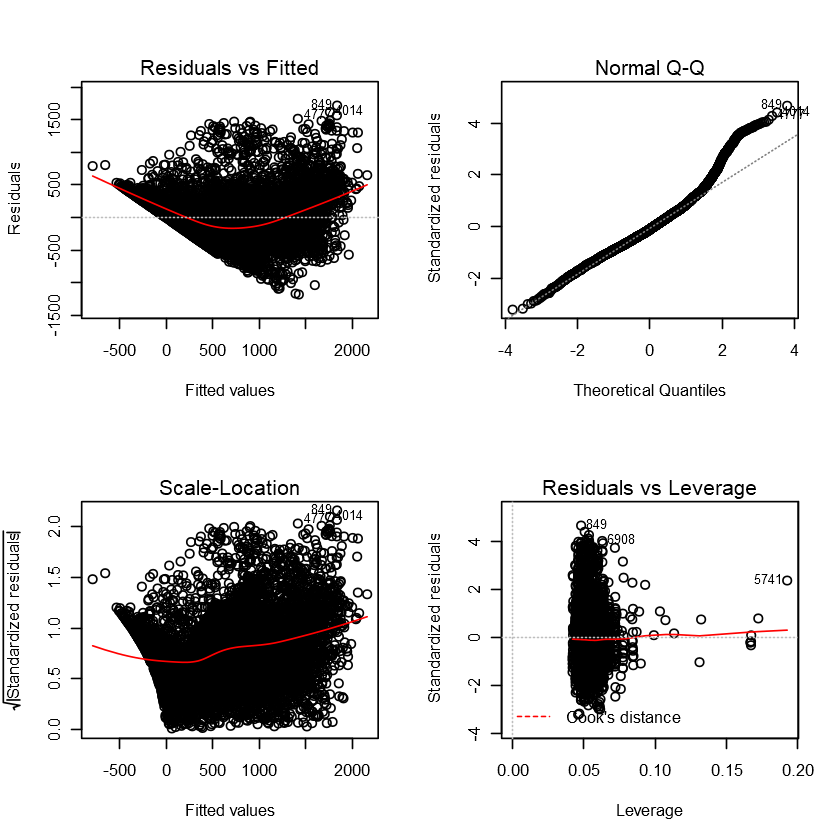

In [17]:
# plot the residuals
par(mfrow=c(2,2))
plot(step_fit)

From the Residual plots - 
- **Residual vs Fitted** - shows the residuals are not distributed around zero, and funnel out as the fitted values increase. This model violates the assumption of homoscedasticity - the error terms change along the regression line
- **Normal Q-Q** - the residuals deviate significantly from the dashed line after the second quantile, indicating the residuals are not normally distributed
- **Scale-Location** - The chart shows the model violates the assumption of equal variance as the residuals appear randomly spread.
- **Residuals vs Leverage** - The chart shows there are some possibly influential outliers, however most of the points are well inside the Cook's distance range.

With regard to the interpretability of the model, we'd prefer a model with less predictors and will proceed to do improvements on **step_fit**.

**Accounting for heteroscedacity**

From the **Residual vs Fitted**  plot we saw that the **step_fit** model violates the homoscedacity assumption and hence, we will update the model using **update()** function to make changes to variables.

In [18]:
# Taking log of the certain variable to adjust for heteroscedacity
log_fit <- update(step_fit, log(Rented.Bike.Count+1) ~ . +log(Wind.speed+1) +log(Visibility+1) +log(Solar.Radiation+1)
                 +log(Rainfall+1) +log(Snowfall+1) -Wind.speed -Visibility  -Snowfall -Rainfall )

Taking the log of certain variables whose distributions were not symmetric as we saw in the **Exploratory Data Analysis** section.

**NOTE: We took log(variable+1) to adjust for the zero values of the variables. As log(1) = 0**

In [19]:
# to show the model parameter values
summary(log_fit)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ Date + Hour + Temperature + 
    Humidity + Solar.Radiation + Functioning.Day + log(Wind.speed + 
    1) + log(Visibility + 1) + log(Solar.Radiation + 1) + log(Rainfall + 
    1) + log(Snowfall + 1), data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2481 -0.2992  0.0018  0.3254  3.1553 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1.6166130  0.3743199  -4.319 1.59e-05 ***
Date1/10/18               1.0445642  0.2319907   4.503 6.83e-06 ***
Date1/11/18               1.2555989  0.2182477   5.753 9.15e-09 ***
Date1/12/17               0.8529730  0.2014252   4.235 2.32e-05 ***
Date1/2/18                0.3532745  0.2149743   1.643 0.100361    
Date1/3/18                0.3295753  0.2155065   1.529 0.126236    
Date1/4/18                0.8110126  0.2194638   3.695 0.000221 ***
Date1/5/18                1.2516312  0.2256916   5.546 3.04e-08 ***
Date1/6/18 

Our new model **log_fit** has significantly high $R^2$ value compared to the previous model, implying that this model is more complex and the variables provide better explanation to the predicted variable.

Now, use step function to remove unimportant variables.

In [20]:
step_log <- step(log_fit)

Start:  AIC=-7184.03
log(Rented.Bike.Count + 1) ~ Date + Hour + Temperature + Humidity + 
    Solar.Radiation + Functioning.Day + log(Wind.speed + 1) + 
    log(Visibility + 1) + log(Solar.Radiation + 1) + log(Rainfall + 
    1) + log(Snowfall + 1)

                            Df Sum of Sq    RSS     AIC
- log(Snowfall + 1)          1      0.21 2259.2 -7185.4
<none>                                   2259.0 -7184.0
- log(Wind.speed + 1)        1      1.84 2260.8 -7180.3
- Humidity                   1     18.75 2277.7 -7128.1
- Temperature                1     53.54 2312.5 -7021.9
- log(Visibility + 1)        1     55.07 2314.1 -7017.2
- Functioning.Day            1     80.53 2339.5 -6940.5
- log(Solar.Radiation + 1)   1     94.44 2353.4 -6899.0
- Solar.Radiation            1    106.15 2365.1 -6864.2
- log(Rainfall + 1)          1    285.47 2544.5 -6352.1
- Hour                       1    366.12 2625.1 -6133.4
- Date                     364   1324.75 3583.7 -4677.9

Step:  AIC=-7185.39
l

In [21]:
summary(step_log)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ Date + Hour + Temperature + 
    Humidity + Solar.Radiation + Functioning.Day + log(Wind.speed + 
    1) + log(Visibility + 1) + log(Solar.Radiation + 1) + log(Rainfall + 
    1), data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2480 -0.3000  0.0019  0.3250  3.1540 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)              -1.6112133  0.3742442  -4.305 1.69e-05 ***
Date1/10/18               1.0405310  0.2319257   4.486 7.36e-06 ***
Date1/11/18               1.2523594  0.2182013   5.739 9.92e-09 ***
Date1/12/17               0.8526245  0.2014187   4.233 2.34e-05 ***
Date1/2/18                0.3856966  0.2108803   1.829 0.067447 .  
Date1/3/18                0.3254273  0.2154340   1.511 0.130947    
Date1/4/18                0.8044880  0.2192965   3.668 0.000246 ***
Date1/5/18                1.2428956  0.2254047   5.514 3.64e-08 ***
Date1/6/18                0.895

Although removing the insignificant variable did not make huge improvements in our model as shown by the summary() function, we will still consider the new model **step_log** as it has less variables.

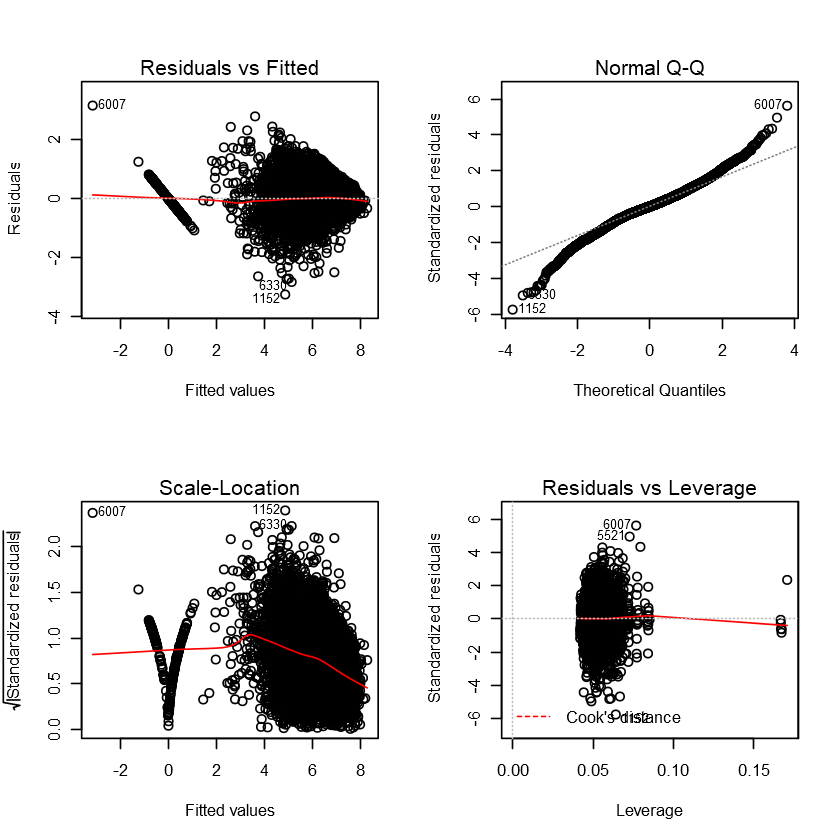

In [22]:
# check the residual plots for the new model
par(mfrow=c(2,2))
plot(step_log)

From the Residual plots - 
- **Residual vs Fitted** - shows the residuals are evenly distributed around zero, and the model now satisfies the assumption of homoscedacity.
- **Normal Q-Q** - the residuals deviate significantly from the dashed line after the second quantile and before the -2 quantile, indicating the residuals are not normally distributed
- **Scale-Location** - The chart shows the model violates the assumption of equal variance as the residuals appear randomly spread.
- **Residuals vs Leverage** - The chart shows there are some possibly influential outliers, however most of the points are well inside the Cook's distance range.

#### Therefore, we consider **step_log** as our first model.

**Interaction Effects**

Now to develop our second model, we add certain interaction effects on the first model and analyse the interaction effect on the predicted variable in the model.

In [23]:
# use update() function to update the previous model
fin_fit <- update(step_log, . ~ . +Humidity:Rainfall +Temperature:Solar.Radiation)

We added the interaction between the foolowing variables based on their natural characteristics -
* Humidity:Rainfall - As we know, naturally as the rain occurs humidity in the air increases.
* Temperature:Solar.Radiation - As the solar radiation effects the temperature in the region

In [24]:
# summarise the model parameters
summary(fin_fit)


Call:
lm(formula = log(Rented.Bike.Count + 1) ~ Date + Hour + Temperature + 
    Humidity + Solar.Radiation + Functioning.Day + log(Wind.speed + 
    1) + log(Visibility + 1) + log(Solar.Radiation + 1) + log(Rainfall + 
    1) + Humidity:Rainfall + Temperature:Solar.Radiation, data = train.data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3168 -0.2911  0.0016  0.3063  2.3778 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -1.2336556  0.3682158  -3.350 0.000812 ***
Date1/10/18                  0.9446563  0.2275042   4.152 3.33e-05 ***
Date1/11/18                  1.1690137  0.2140354   5.462 4.89e-08 ***
Date1/12/17                  0.8424153  0.1974728   4.266 2.02e-05 ***
Date1/2/18                   0.3614619  0.2067651   1.748 0.080480 .  
Date1/3/18                   0.1512813  0.2117533   0.714 0.474991    
Date1/4/18                   0.6925271  0.2151172   3.219 0.001291 ** 
Date1/5/18               

This model looks promising as the $R^2$ value is slighly improved from the previous model and all the interactions have come out to be significant. Therefore, we do not further improvise this model and use **fin_fit** as our second model.

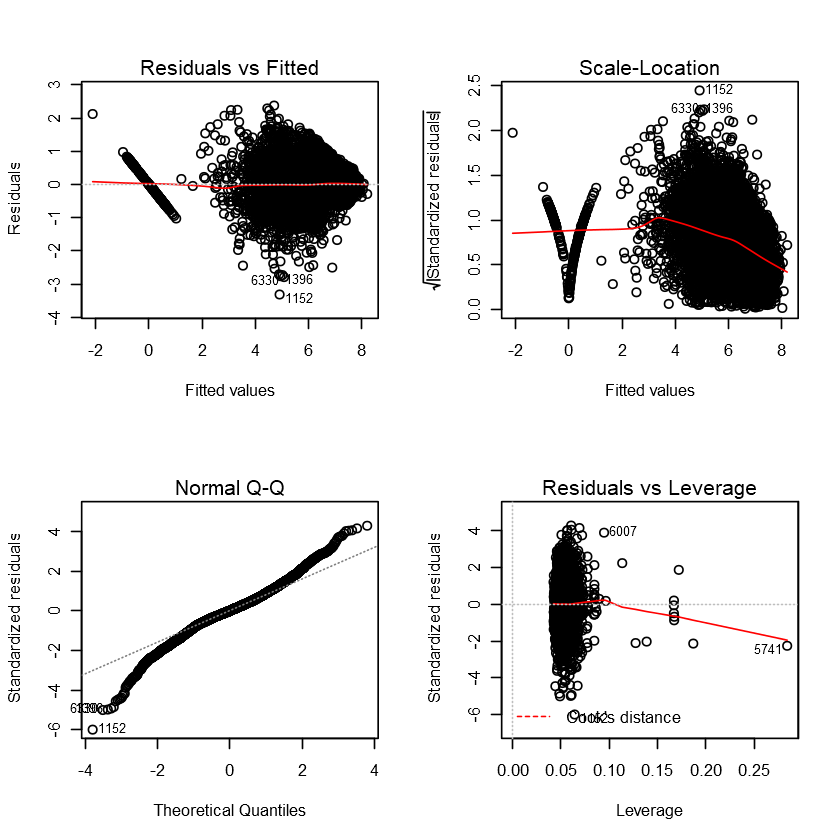

In [25]:
# check the residual plots
par(mfcol=c(2,2))
plot(fin_fit)

From the Residual plots - 
- **Residual vs Fitted** - shows the residuals are evenly distributed around zero.
- **Normal Q-Q** - the residuals deviate significantly from the dashed line after the second quantile and before the -2 quantile, indicating the residuals are not normally distributed
- **Scale-Location** - The chart shows the model violates the assumption of equal variance as the residuals appear randomly spread.
- **Residuals vs Leverage** - The chart shows there are some possibly influential outliers, however most of the points are well inside the Cook's distance range. Point 5741 looks like a highly influential point which will be analysed later.

Finally our second model is **fin_fit** model and now, we will analyse the best model out of the two models.

## 6. Model Comparison <a class="anchor" id="sec_6"></a>

First we perform, ANOVA test to check whether the two models are significantly different.

In [26]:
# anova() function used for both the models
anova(step_log, fin_fit)

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
6634,2259.186,NA,NA,NA,NA
6632,2170.835,2,88.35135,134.9587,3.544089e-58


Getting a very low p-value indicates that **fin_fit** model is significantly statistically different from the **step_log** model.

Now, we perform the prediction task on **test.data** for both the models -

In [27]:
# read in the test data
test.data = read.csv('test.csv',T)

In [28]:
# use predict() function to make the predictions
model1.pred <-exp(predict(step_log, test.data))  # for model 1
model2.pred <- exp(predict(fin_fit, test.data))  # for model 2

**We do exp() of the predicted value as both of our models predict the log() of the predicted variable.**

Use the **caret** package to find the $R^2$, RMSE, MAE and RMSE mean values

In [29]:
# make error vector for model 1
model1.errors <- c(R2(model1.pred,test.data$Rented.Bike.Count),
RMSE(model1.pred, test.data$Rented.Bike.Count),
MAE(model1.pred, test.data$Rented.Bike.Count),
RMSE(model1.pred, test.data$Rented.Bike.Count)/mean(test.data$Rented.Bike.Count))

In [30]:
# make error vector for model 2
model2.errors <- c(R2(model2.pred,test.data$Rented.Bike.Count),
RMSE(model2.pred, test.data$Rented.Bike.Count),
MAE(model2.pred, test.data$Rented.Bike.Count),
RMSE(model2.pred, test.data$Rented.Bike.Count)/mean(test.data$Rented.Bike.Count))

In [31]:
# combine both vectors in a data frame
errors <- as.data.frame(cbind(model1.errors, model2.errors))

In [32]:
# each row depicts different type of error
rownames(errors) <- c('R2','RMSE','MAE','RMSE mean')

In [33]:
# display the errors
errors

,model1.errors,model2.errors
R2,0.7165710,0.7381604
RMSE,346.6232971,333.2384588
MAE,225.5705509,215.0580254
RMSE mean,0.4879218,0.4690807


From the above errors dataframe - 

* R2 for model2 is greater than model1 and RMSE,MAE,RMSE(mean) for model2 is less than model1.  Therefore, model2 is better at prediction than model1


Therefore, we select **model2(fin_fit)** as our candidate model out of the two developed models.

## 7. Inference <a class="anchor" id="sec_7"></a>

As we have trained our models on the **training data** provided and selected **fin_fit** as our best model that describes all the variations in our data, we will use the summary findings of fin_fit to provide the influential variables.

Our final selected model contains only the most significant attributes with **p-value<0.01** but the **Date** attribute is sub-divided in different levels. Although, **Date** as it is highly significant but certain date levels are not significant enough.

We will check our model coefficients to determine the influence of other variables on the **Rented.bike.Count**.

In [34]:
# get the variable coefficients
fin_fit$coef

(Intercept)                 Date1/10/18 
               -1.233655583                 0.944656281 
                Date1/11/18                 Date1/12/17 
                1.169013686                 0.842415344 
                 Date1/2/18                  Date1/3/18 
                0.361461869                 0.151281299 
                 Date1/4/18                  Date1/5/18 
                0.692527130                 1.098497475 
                 Date1/6/18                  Date1/7/18 
                0.824892014                -0.917471621 
                 Date1/8/18                  Date1/9/18 
               -0.088996754                 0.622869884 
                Date10/1/18                Date10/10/18 
                0.325547189                 0.988514843 
               Date10/11/18                Date10/12/17 
                1.206186998                -0.058028241 
                Date10/2/18                 Date10/3/18 
                0.200611221                 0.866948642 
                Date10/4/18                 Date10/5/18 
                0.510809888                -1.512066244 
                Date10/6/18                 Date10/7/18 
                0.520303300                 0.578037523 
                Date10/8/18                 Date10/9/18 
                0.226557638                 0.602298493 
                Date11/1/18                Date11/10/18 
                0.440976192                 1.121239039 
               Date11/11/18                Date11/12/17 
                1.111662796                 0.437722212 
                Date11/2/18                 Date11/3/18 
               -0.290764518                 0.613475859 
                Date11/4/18                 Date11/5/18 
               -1.440225836                 1.298269071 
                Date11/6/18                 Date11/7/18 
                0.746079639                 0.526447888 
                Date11/8/18                 Date11/9/18 
               -0.008233907                 0.703847673 
                Date12/1/18                Date12/10/18 
                0.453524845                 1.273600761 
               Date12/11/18                Date12/12/17 
                0.984707145                 0.595890144 
                Date12/2/18                 Date12/3/18 
                0.080453528                 0.707879097 
                Date12/4/18                 Date12/5/18 
                0.765982529                -0.455470207 
                Date12/6/18                 Date12/7/18 
                0.910811129                 0.595103695 
                Date12/8/18                 Date12/9/18 
                0.009637099                 0.840400471 
                Date13/1/18                Date13/10/18 
                0.372821364                 1.105439916 
               Date13/11/18                Date13/12/17 
                1.152768662                 0.722107295 
                Date13/2/18                 Date13/3/18 
                0.290189758                 0.722838314 
                Date13/4/18                 Date13/5/18 
                0.559682252                 1.128373583 
                Date13/6/18                 Date13/7/18 
                1.096357501                 0.570809751 
                Date13/8/18                 Date13/9/18 
                0.213744159                 0.571521431 
                Date14/1/18                Date14/10/18 
                0.345696427                 1.025959178 
               Date14/11/18                Date14/12/17 
                1.155181573                 0.667808291 
                Date14/2/18                 Date14/3/18 
                0.212524297                 0.392737975 
                Date14/4/18                 Date14/5/18 
               -0.214576390                 1.365081661 
                Date14/6/18                 Date14/7/18 
                0.844023628                 0.503908115 
                Date14/8/1

From the above list of variables and their coefficients - 

* **Functioning.DayYes** variable is a discrete variable and has the highest positive influence on the change in the log of number of rented bikes. This is highly true because if the rentals are functioning, then only the bikes can be rented for use.


* **log(Rainfall + 1)** variable has the highest negative influence amongst all the continuous variable on the change in the log of number of rented bikes. This was also previously discussed in the correlation matrix as **Rainfall** variable had **-0.12** correlation value with **Rented.Bike.Count** variable. Also in practicality, if there is rainfall, then people would less prefer to rent bikes.


* **log(Solar.Radiation + 1)** variable has a positive influence on the change in the log of number of rented bikes. This is observed in this case because the region in focus receives less solar radiation and the maximum was 3.5 MJ/sq.m. which is 1/10th of the maximum solar radiation level. Therefore, in our case people enjoy to go out in sun and hence the number of rented bikes increase with the increase in solar radiation. This would not have been the case in a relatively hot region where scorching heat would have discouraged people from renting the bikes and hence, solar radiation would have negatively affected the predicted variable.

## 8. Conclusion<a class="anchor" id="sec_8"></a>

From the above prediction task we conclude that -

* Renting a bike can depend on multiple factors where some factors influence positively, while others negatively.


* In our data, **Seasons** and **Holiday** had an insignificant effect on the number of rented bikes. But in the exploratory data analysis, we observed the effect of these variables on the rented bike count. It can be explained as, these discrete variables can identify if the rented bike count will go up or decline but not significantly explain the change in the count.

* All the significant variables are included in the selected candidate model, but certain **Date** levels are not significant for our prediction and still included.

* More parameter tuning might provide much better results than our selected model. There is scope for improvement.

## 9. References <a class="anchor" id="sec_9"></a>

* To understand the usage of the **caret** package.
http://www.sthda.com/english/articles/38-regression-model-validation/157-cross-validation-essentials-in-r/

* Most of the code is referenced from the **Course Tutorial** material and **House Prediction** notebook  provided.